# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [195]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [196]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [197]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [198]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: north
step 1 - action: suck
step 2 - action: south
step 3 - action: east
step 4 - action: west
step 5 - action: east
step 6 - action: west
step 7 - action: east
step 8 - action: west
step 9 - action: west
step 10 - action: south
step 11 - action: west
step 12 - action: suck
step 13 - action: north
step 14 - action: suck
step 15 - action: west
step 16 - action: suck
step 17 - action: south
step 18 - action: east
step 19 - action: west


4

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

### Description of Code
My simple environment takes in an agent program, number of rows, number of columns, and a verbose flag, then generates a random environment of dirty and clean spaces. For the environment, there is a 20% chance that a spot is dirty, which then is shown by a "True" value in the grid. The environment then runs a while loop until all of the dirty spots have been cleaned, calling the agent function and outputting steps and relevant information about each iteration. Once all of the spots have been cleaned, the program ends and displays the number of clean operations performed and the number of total actions taken.

### Implementation

In [199]:


#simple environment with rows and column parameters
def simple_environment(agent, rows, columns, verbose = True):
    num_cleaned = 0
    total_ops = 0

    #create a 2D array of size rows x columns with a 20% chance of being dirty
    environment = np.random.choice([False, True], size=(rows, columns), p=[0.8, 0.2])

    #print(environment)

    #set the initial location to a random location
    currRow = np.random.randint(0, rows)
    currCol = np.random.randint(0, columns)

    #find how many dirty squares there are
    num_dirty = np.count_nonzero(environment)
    # print("num_dirty", num_dirty)
    
    while (num_dirty != num_cleaned):
        dirty = environment[currRow][currCol]
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        #set the bumpers
        if (currRow == 0):
            bumpers["north"] = True
        if (currRow == rows - 1):
            bumpers["south"] = True
        if (currCol == 0):
            bumpers["west"] = True
        if (currCol == columns - 1):
            bumpers["east"] = True

        action = agent(bumpers, dirty)
        total_ops = total_ops + 1
        #if (verbose): print("step", total_ops , "- action:", action, "current spot:", currRow, currCol)
        
        if (action == "suck" and environment[currRow][currCol] == True): 
            num_cleaned = num_cleaned + 1
            environment[currRow][currCol] = False

        if (action == "stop"):
            break

        #move the agent
        if (action == "north" and not bumpers["north"]):
            currRow = currRow - 1
        elif (action == "east" and not bumpers["east"]):
            currCol = currCol + 1
        elif (action == "west" and not bumpers["west"]):
            currCol = currCol - 1
        elif (action == "south" and not bumpers["south"]):
            currRow = currRow + 1

        #check if the agent has cleaned all the dirty squares
        if (num_cleaned == num_dirty):
            break
        
    # print ("number of cleaned spots ", num_cleaned)
    # print ("number of operations ", total_ops)
    return total_ops



## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

### Description of simple reflex agent

This simple reflex agent takes in the parameters of the bumper and dirty sensors and nothing else. The agent when called checks to see whether or not the spot is dirty, and cleans if needed. The agent then randomly chooses a direction to move. As long as the direction does not have a bumper in the way, which is checked in a while loop, the agent will return and move that direction.

### Implementation of simple reflex agent

In [200]:

#create simple reflex agent
def simple_reflex_agent(bumpers, dirty):
    if (dirty):
        return "suck"
    direction = np.random.choice(["north", "east", "west", "south"])
    move = False
    while (not move):
        if (direction == "north" and not bumpers["north"]):
            move = True
        elif (direction == "east" and not bumpers["east"]):
            move = True
        elif (direction == "west" and not bumpers["west"]):
            move = True
        elif (direction == "south" and not bumpers["south"]):
            move = True
        else:
            direction = np.random.choice(["north", "east", "west", "south"])

    return direction

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

### Description of agent

This model-based reflex agent was created as a class to help with initialization and use with the previously created environment. In this class, the agent has an initialization function, giving it an initial field of information (as an array of zeroes), an initial starting point (measured with a current row and column integer) and a flag to see whether or not it should be cleaning or moving to a starting position. The class then has the agent function, which has an instance of the class, the bumper sensor and the dirty sensor. The agent class first deals with moving itself to the north-western position of the room to use as a starting point, since it starts randomly somewhere in the room based on the environment. The agent will continue to move west and then north until it finds the corner, where it then stops and sets the "beginModel" flag to true, which will start the cleaning process. The agent will then move to the east, checking for the bumper while marking its current position with a flag. Once it reaches the bumper, it will change direction moving south until it detects another bumper. Once this is repeated and it begins heading towards the origin point, the agent also starts detecting whether or not it has already been to a spot or not, then changing direction based on that information. Using this stored knowledge of the precepts, the agent will eventually reach all of the dirty spots, cleaning them. 

### Description of the State

In this agent, there are two states, the one used to clean, and the one used before cleaning to get to the "origin" of the room. The first stage, used to get to the origin, continually moving in the west direction until the west bumper is triggered. It then moves in the northern direction until it reaches the northern bumper, where it stops and swithces states. Once in this state, the cleaning algorithm begins, as mentioned in the description above. 

In [201]:
class ModelBasedReflexAgent:
    def __init__(self):
        self.beginModel = False
        self.model = np.zeros((1000, 1000), dtype = int)
        self.currRow = 0
        self.currCol = 0

    def agent(self, bumpers, dirty):
        if (not self.beginModel):
            if (not bumpers["west"]):
                self.currCol = self.currCol - 1
                return "west"
            elif (not bumpers["north"]):
                self.currRow = self.currRow - 1
                return "north"
            else:
                self.beginModel = True
                self.model[self.currRow][self.currCol] = 1
        else:
            if (dirty):
                self.model[self.currRow][self.currCol] = 1
                return "suck"
            else:
                self.model[self.currRow][self.currCol] = 2
                if (not bumpers["east"] and self.model[self.currRow][self.currCol + 1] == 0):
                    self.currCol = self.currCol + 1
                    return "east"
                elif (not bumpers["south"] and self.model[self.currRow + 1][self.currCol] == 0):
                    self.currRow = self.currRow + 1
                    return "south"
                elif (not bumpers["west"] and self.model[self.currRow][self.currCol - 1] == 0):
                    self.currCol = self.currCol - 1
                    return "west"
                elif (not bumpers["north"] and self.model[self.currRow - 1][self.currCol] == 0):
                    self.currRow = self.currRow - 1
                    return "north"
                else:
                    return "stop"

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [202]:
# # randomized agent data
total = 0
avg = 0
for i in range(100):
    total = total + simple_environment(simple_randomized_agent, rows = 5, columns = 5)
avg = total / 100
print("average number of operations for simple random agent", avg)

total = 0
avg = 0
for i in range(100):
    total = total + simple_environment(simple_randomized_agent, rows = 10, columns = 10)
avg = total / 100
print("average number of operations for simple random agent", avg)

# total = 0
# avg = 0
# for i in range(100):
#     total = total + simple_environment(simple_randomized_agent, rows = 100, columns = 100)
# avg = total / 100
# print("average number of operations for simple reflex agent", avg)


# # simple reflex agent data
total = 0
avg = 0
for i in range(100):
    total = total + simple_environment(simple_reflex_agent, rows = 5, columns = 5)
avg = total / 100
print("average number of operations for simple reflex agent", avg)

total = 0
avg = 0
for i in range(100):
    total = total + simple_environment(simple_reflex_agent, rows = 10, columns = 10)
avg = total / 100
print("average number of operations for simple reflex agent", avg)

# total = 0
# avg = 0
# for i in range(100):
#     total = total + simple_environment(simple_reflex_agent, rows = 100, columns = 100)
# avg = total / 100
# print("average number of operations for simple reflex agent", avg)


# model based reflex agent data
total = 0
avg = 0
for i in range(100):
    total = total + simple_environment(ModelBasedReflexAgent().agent, rows = 5, columns = 5)
avg = total / 100
print("average number of operations for model-based reflex agent", avg)

total = 0
avg = 0
for i in range(100):
    total = total + simple_environment(ModelBasedReflexAgent().agent, rows = 10, columns = 10)
avg = total / 100
print("average number of operations for model-based reflex agent", avg)

total = 0
avg = 0
for i in range(100):
    total = total + simple_environment(ModelBasedReflexAgent().agent, rows = 100, columns = 100)
avg = total / 100
print("average number of operations for model-based reflex agent", avg)

average number of operations for simple random agent 400.4
average number of operations for simple random agent 3335.71
average number of operations for simple reflex agent 109.07
average number of operations for simple reflex agent 884.96
average number of operations for model-based reflex agent 29.64
average number of operations for model-based reflex agent 124.23
average number of operations for model-based reflex agent 12097.07


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 443 | 103 | 30 |
| 10x10   | 2908 | 869 | 125 |
| 100x100 | N/A | N/A | 12092 |

Add charts to compare the performance of the different agents.

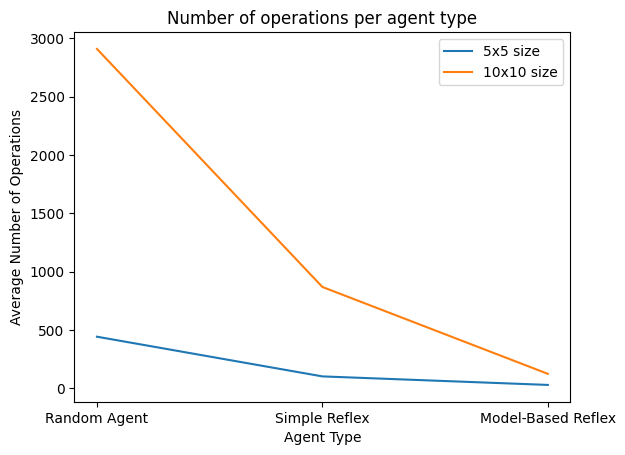

In [203]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt

#graph of 5x5 data
x = ["Random Agent", "Simple Reflex", "Model-Based Reflex"]
y = [443, 103, 30]
y1 = [2908, 869, 125]
plt.plot(x, y, label = "5x5 size")
plt.plot(x, y1, label = "10x10 size")
plt.xlabel("Agent Type")
plt.ylabel("Average Number of Operations")
plt.title("Number of operations per agent type")
plt.legend()
plt.show()



This graph depicts the type of agent, versus the number of average operations performed, on rooms with sizes 5x5 and 10x10. The graph tells us that the Random agent has a far higher average number of operations, while the model-based reflex agent has a much lower average amount. 

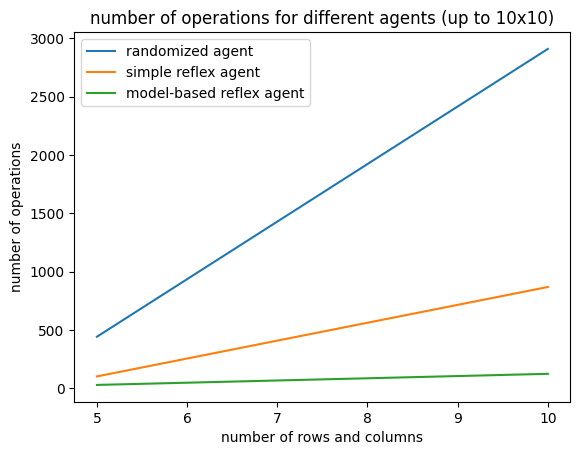

In [204]:


#graph of known data to 10x10
x = [5, 10]
y = [443, 2908]
y1 = [103, 869]
y2 = [30, 125]
plt.plot(x, y, label = "randomized agent")
plt.plot(x, y1, label = "simple reflex agent")
plt.plot(x, y2, label = "model-based reflex agent")
plt.xlabel("number of rows and columns")
plt.ylabel("number of operations")
plt.title("number of operations for different agents (up to 10x10)")
plt.legend()
plt.show()



This graph depicts the number of rows and columns of a room versus the average number of operations. As seen above, the rooms that are only 5x5 have much lower average numbers of operations, with the rooms of size 10x10 having far greater average amounts. This tells us that the larger the size of the room, the greater the amount of average operations, with the randomized agent increasing by a massive amount, and the model-based growing at a much slower rate.

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

### If put into a rectangular room with unkown size:
If the random agent is put into a rectangular room with unkown size would operate similarly, as size of the room is not taken into consideration when deciding where it will move next. The simple reflex will operate similarly as well, as its movement is not determined by the room shape or size. The model-based reflex agent will also not vary much from its previous performance, only increasing operations with size as it tries to navigate to the corner and then circle the room checking for dirty spots. 

### If put into a room with an irregular shape:
In this scenario, the random and simple reflex agents will not see much change, as again they do not take in input, with the simple reflex agent only detecting for dirt. The model-based agent though will run into some trouble in the hallway experiment, assuming the hallways are one unit wide. If the agent travels down one hallway and returns through the other, the hallway will then be cut off as the agent will think that it has already traveled those spots, effectively blocking it from going back to clean the other room, leaving its data very skewed.

### If put into a room with obstacles:
If the random agent were put into a scenario with a randomly placed obstacle, the agent's behavior and productivity would again not change much, just having to navigate around obstacles as if they were walls, but still making a random decsion at every instruction. The simple reflex would operate similarly, only conserving operations when not detecting a dirty spot, and still having to randomly move while treating obstacles as walls. Depending on the and location of the obstacle, the model-based reflex agent would most likely still work, as long as the obstacles were placed in a way that would send the agent in a loop. If the object was placed alone randomly in the room, the agent would most likely navigate around it, still trying to spiral to the middle. If there were multiple objects, some of which forming walls, the agent might run into a problem, creating a loop in on itself trapping it, or blocking itself off from the rest of the room by blocking itself into a hole.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [205]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [206]:
# Your ideas/code